# Logistic regression implementation
1.Logistic regression:
   -Logistic regression is a method used to predict yes/no (1 or 0) outcomes.
   

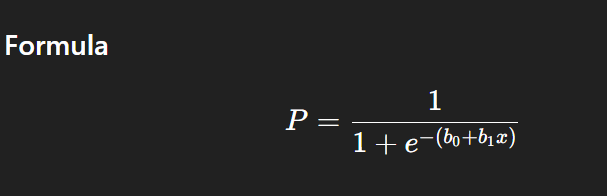

# where:
### P = probability of “yes”.
### b0 = intercept.
### b1 = coefficient for the variable (like study hours).
### x = input (e.g., number of hours studied).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
data 

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# logistic regression till now we have studied, with two values of the variables >> binary classification

In [8]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# create data 'Frame'
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target # add columns

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# last five data 'tall'
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [13]:
# Random data >> 'sample'
df.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
59,5.2,2.7,3.9,1.4,1


In [14]:
df.target.unique()

array([0, 1, 2])

In [15]:
#for binary classification >> only two class needed, so we will filter out class 2

df['target'] != 2


0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: target, Length: 150, dtype: bool

In [16]:
df = df[df['target'] != 2]

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [18]:
df.target.unique()

array([0, 1])

In [19]:
# check the null values
print(df["sepal length (cm)"].isna().sum())
print(df['target'].isnull().sum())

0
0


In [20]:
x = df.iloc[:, :-1] # all the rows and all columns except -1
y = df.iloc[:, -1] # all the rows and only last columns

In [21]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [22]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [23]:
# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=1)


In [24]:
x_train.shape # 80 rows and 4 columns 

(80, 4)

In [25]:
x_test.shape

(20, 4)

In [26]:
# model training 
from sklearn.linear_model import LogisticRegression

In [27]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [28]:
# train the  model
classifier.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [30]:
# predict the probability
classifier.predict_proba(x_test) # corresponding to higher probability class is predicted, cutoff is 0.5 

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

In [31]:
# evaluted metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [32]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0],
       [ 0, 12]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred)

1.0

In [34]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         8\n           1       1.00      1.00      1.00        12\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

In [35]:
# first two rows, 0 and 1 >> prescision, fit score and no of data points with respect to respective class 
# macroavg >> for each class take simple avg >> avg precision of class 0 and class 1 will be macro average 
# similarly for recall, f1 score
# support will be total no of datapoints

# weighted is used in case of class imbance, it gives importance to perfromance of dominant class

In [41]:
from sklearn.metrics import roc_auc_score, auc ,roc_curve

# get predicted probabilites of class 1
classifier.predict_proba(x_test)[:, 1] # probability for one class

array([0.95956738, 0.98953877, 0.01293241, 0.94559484, 0.8616652 ,
       0.02033869, 0.01795496, 0.96707768, 0.96619427, 0.99149484,
       0.97533966, 0.02484146, 0.99482163, 0.99761634, 0.9922547 ,
       0.01380658, 0.03402464, 0.05092174, 0.99264507, 0.02257023])

In [42]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]

In [43]:
y_pred_proba

array([0.95956738, 0.98953877, 0.01293241, 0.94559484, 0.8616652 ,
       0.02033869, 0.01795496, 0.96707768, 0.96619427, 0.99149484,
       0.97533966, 0.02484146, 0.99482163, 0.99761634, 0.9922547 ,
       0.01380658, 0.03402464, 0.05092174, 0.99264507, 0.02257023])

In [44]:
# ROC >> reciver operating characteristics curve.
# inputes : y_test, y_pred_proba, it will return FPR with different cutoff of probabilites
fpr, tpr, threshollds = roc_curve(y_test, y_pred_proba)

In [45]:
threshollds

array([       inf, 0.99761634, 0.8616652 , 0.01293241])

In [46]:
tpr

array([0.        , 0.08333333, 1.        , 1.        ])

In [47]:
fpr

array([0., 0., 0., 1.])

In [50]:
roc_auc = auc(fpr, tpr)
roc_auc

1.0

plot roc auc curve

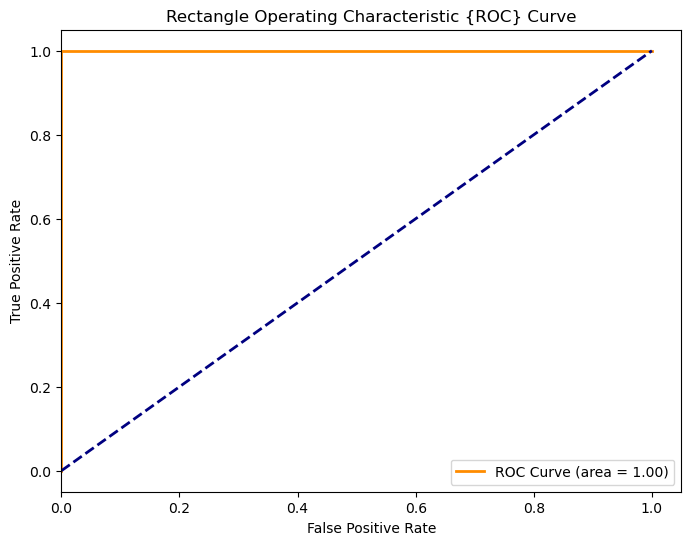

In [56]:
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = "darkorange", linewidth=2, label = 'ROC Curve (area = %0.2f)' % roc_auc) # plot
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle="--") # plot the diagonal line repersention
plt.xlim([0.0, 1.0]) # Set x-axis limints
plt.xlim([0.0, 1.05]) # set y-axis limits
plt.xlabel('False Positive Rate' ) # set x axis label
plt.ylabel('True Positive Rate') # set y-axis label 
plt.title('Rectangle Operating Characteristic {ROC} Curve') # set title
plt.legend(loc="lower right") # add legend to the plot
plt.show() # show the plot

In [ ]:
# cross validation 
# Randomized search cv or grid search cv >> generic method with hyperparameter tuning
# Logistic Regression CV >> specific to regresssion 
# kfold >> genric method only for cross validation

In [60]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold


In [61]:
cv = KFold(n_splits=5)

#shuffile: bool, defoult: false
# whether to shuffle the data before splitting into btaches.
# note that the sample withing each splite will bot be shuffled

In [62]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv= cv, scoring='accuracy')

In [64]:
scores

array([1., 1., 1., 1., 1.])

In [65]:
np.mean(scores)

1.0